In [1]:
from sklearn.datasets import load_breast_cancer

bc = load_breast_cancer()


 ! pip install library_name

In [2]:
print(bc.DESCR)


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

# dataset info

In [3]:
bc.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [4]:
bc.target.shape

(569,)

In [5]:
bc.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]], shape=(569, 30))

In [6]:
bc.data.shape

(569, 30)

# preprocessing

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
x = scaler.fit_transform(bc.data)


In [8]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,bc.target,test_size=0.2)

In [9]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [10]:
x_train[0]

array([0.37053339, 0.16875211, 0.35153065, 0.2278685 , 0.28969938,
       0.09441139, 0.08003749, 0.12629225, 0.30252525, 0.07413648,
       0.03863842, 0.05812412, 0.0433492 , 0.02599561, 0.16979978,
       0.07298645, 0.03742424, 0.20003789, 0.11141442, 0.03054738,
       0.27321238, 0.14818763, 0.25544101, 0.14131931, 0.28217658,
       0.07161083, 0.0879393 , 0.2733677 , 0.15158683, 0.04184704])

# classification

In [11]:
from sklearn.metrics import accuracy_score, recall_score, precision_score


def calculate_m(y_train, y_test, y_pre_train, y_pre_test):
    acc_train = accuracy_score(y_train, y_pre_train)
    acc_test = accuracy_score(y_test, y_pre_test)
    re_test = recall_score(y_test, y_pre_test)
    pre_test = precision_score(y_test, y_pre_test)

    print(
        f"acc train:{acc_train} - acc test:{acc_test} - recall test:{re_test} - precision test:{pre_test} - "
    )

    return acc_train, acc_test, re_test, pre_test

# 1. Naive bayes

In [12]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)


GaussianNB()

In [13]:
y_pre_train = nb.predict(x_train)
y_pre_test = nb.predict(x_test)

acc_train_nb,acc_test_nb,re_test_nb,pre_test_nb = calculate_m(y_train,y_test,y_pre_train,y_pre_test)

acc train:0.9428571428571428 - acc test:0.9210526315789473 - recall test:0.9066666666666666 - precision test:0.9714285714285714 - 


# KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [15]:
y_pre_train = knn.predict(x_train)
y_pre_test = knn.predict(x_test)

acc_train_knn,acc_test_knn,re_test_knn,pre_test_knn = calculate_m(y_train,y_test,y_pre_train,y_pre_test)

acc train:0.9714285714285714 - acc test:0.9473684210526315 - recall test:0.9466666666666667 - precision test:0.9726027397260274 - 


# decission tree

In [16]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=64,min_samples_split=2)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=64)

In [17]:
y_pre_train = dt.predict(x_train)
y_pre_test = dt.predict(x_test)

acc_train_dt,acc_test_dt,re_test_dt,pre_test_dt = calculate_m(y_train,y_test,y_pre_train,y_pre_test)

acc train:1.0 - acc test:0.9473684210526315 - recall test:0.9466666666666667 - precision test:0.9726027397260274 - 


# random forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=32,min_samples_split=2,n_estimators=1000)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=32, n_estimators=1000)

In [19]:
y_pre_train = rf.predict(x_train)
y_pre_test = rf.predict(x_test)

acc_train_rf,acc_test_rf,re_test_rf,pre_test_rf = calculate_m(y_train,y_test,y_pre_train,y_pre_test)

acc train:1.0 - acc test:0.9649122807017544 - recall test:0.96 - precision test:0.9863013698630136 - 


# support vector mashine

In [20]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf')
svm.fit(x_train, y_train)

SVC()

In [21]:
y_pre_train = svm.predict(x_train)
y_pre_test = svm.predict(x_test)

acc_train_svm,acc_test_svm,re_test_svm,pre_test_svm = calculate_m(y_train,y_test,y_pre_train,y_pre_test)

acc train:0.9846153846153847 - acc test:0.9736842105263158 - recall test:0.9733333333333334 - precision test:0.9864864864864865 - 


# logistic regression

In [22]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [23]:
y_pre_train = lr.predict(x_train)
y_pre_test = lr.predict(x_test)

acc_train_lr,acc_test_lr,re_test_lr,pre_test_lr = calculate_m(y_train,y_test,y_pre_train,y_pre_test)

acc train:0.9714285714285714 - acc test:0.9649122807017544 - recall test:0.9866666666666667 - precision test:0.961038961038961 - 


# ANN

In [24]:
from sklearn.neural_network import MLPClassifier

ann = MLPClassifier(max_iter=200,hidden_layer_sizes=1024)
ann.fit(x_train, y_train)

c:\Users\Taha\Desktop\python_p\AI\Learning_venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=1024)

In [25]:
y_pre_train = ann.predict(x_train)
y_pre_test = ann.predict(x_test)

acc_train_ann,acc_test_ann,re_test_ann,pre_test_ann = calculate_m(y_train,y_test,y_pre_train,y_pre_test)

acc train:0.9846153846153847 - acc test:0.9736842105263158 - recall test:0.9733333333333334 - precision test:0.9864864864864865 - 


# comparison

<BarContainer object of 7 artists>

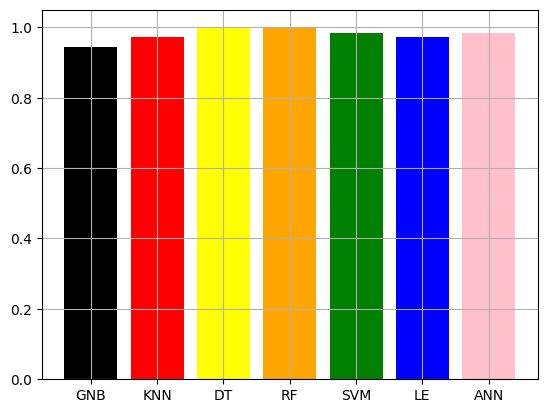

In [26]:
import matplotlib.pyplot as plt

acc_train = [acc_train_nb,acc_train_knn,acc_train_dt,acc_train_rf,acc_train_svm,acc_train_lr,acc_train_ann]
title = ['GNB','KNN','DT','RF','SVM','LE','ANN']
color = ['black','red','yellow','orange','green','blue','pink']
plt.grid()
plt.bar(title,acc_train,color=color)

<BarContainer object of 7 artists>

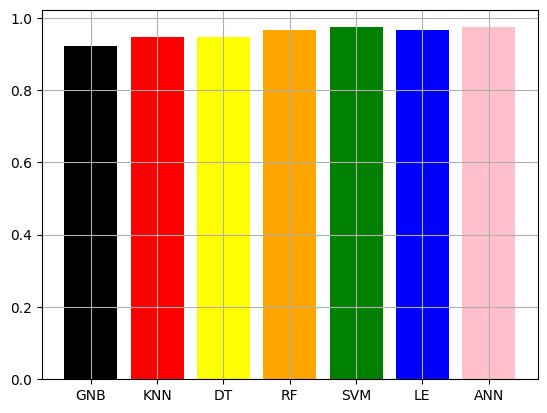

In [27]:
acc_test = [acc_test_nb,acc_test_knn,acc_test_dt,acc_test_rf,acc_test_svm,acc_test_lr,acc_test_ann]
title = ['GNB','KNN','DT','RF','SVM','LE','ANN']
color = ['black','red','yellow','orange','green','blue','pink']
plt.grid()
plt.bar(title,acc_test,color=color)

<BarContainer object of 7 artists>

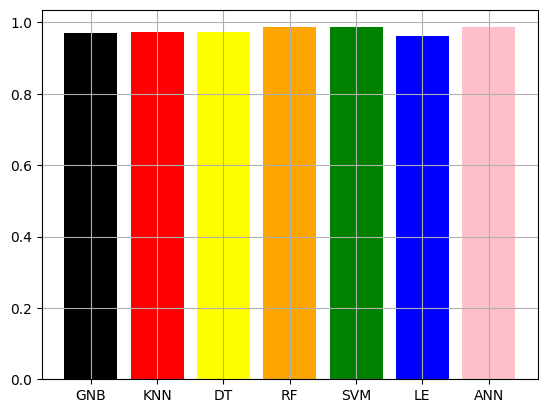

In [28]:
pre_test = [pre_test_nb,pre_test_knn,pre_test_dt,pre_test_rf,pre_test_svm,pre_test_lr,pre_test_ann]
title = ['GNB','KNN','DT','RF','SVM','LE','ANN']
color = ['black','red','yellow','orange','green','blue','pink']
plt.grid()
plt.bar(title,pre_test,color=color)

<BarContainer object of 7 artists>

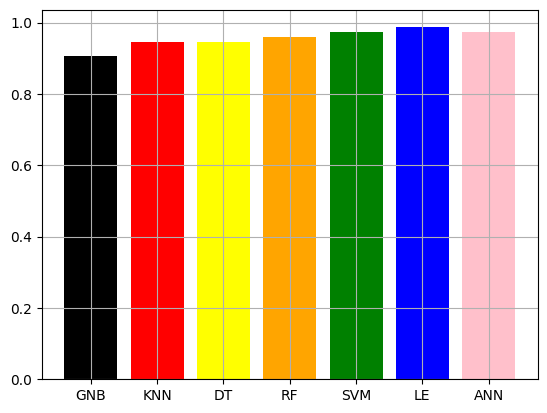

In [ ]:


re_test = [re_test_nb,re_test_knn,re_test_dt,re_test_rf,re_test_svm,re_test_lr,re_test_ann]
title = ['GNB','KNN','DT','RF','SVM','LE','ANN']
color = ['black','red','yellow','orange','green','blue','pink']
plt.grid()
plt.bar(title,re_test,color=color)